In [453]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso


from sklearn.linear_model import LassoCV

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [454]:
df = pd.read_csv('../datasets/final_df/crime_total.csv',parse_dates=['dispatch_date'])

In [458]:
df['month'] = df.dispatch_date.dt.month

In [459]:
df['year'] = df.year.astype(str)
df['month'] = df.month.astype(str)
df['zipcode'] = df.zipcode.astype(str)

ohecols = ['zipcode','year','month']

In [460]:
one_hot = pd.get_dummies(df[ohecols])
df = df.drop(ohecols,axis=1)
df = df.join(one_hot)
df

,dispatch_date,text_general_code_Aggravated Assault Firearm,text_general_code_Aggravated Assault No Firearm,text_general_code_All Other Offenses,text_general_code_Arson,text_general_code_Burglary Non-Residential,text_general_code_Burglary Residential,text_general_code_DRIVING UNDER THE INFLUENCE,text_general_code_Disorderly Conduct,text_general_code_Embezzlement,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,2006-01-01,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2006-02-01,0,2,0,0,4,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2006-03-01,0,1,0,0,6,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2006-04-01,0,1,0,0,3,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2006-05-01,0,2,1,0,2,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22186,2019-12-01,1,3,0,0,1,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
22187,2020-01-01,0,3,0,0,2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22188,2020-02-01,0,4,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
22189,2020-03-01,0,2,1,0,2,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [461]:
df['time_delta'] = df.index.values

In [462]:
df = df.drop(columns = ['dispatch_date'])
y_var = 'num_crimes'

crimecols = ['text_general_code_Aggravated Assault Firearm',
 'text_general_code_Aggravated Assault No Firearm',
 'text_general_code_All Other Offenses',
 'text_general_code_Arson',
 'text_general_code_Burglary Non-Residential',
 'text_general_code_Burglary Residential',
 'text_general_code_DRIVING UNDER THE INFLUENCE',
 'text_general_code_Disorderly Conduct',
 'text_general_code_Embezzlement',
 'text_general_code_Forgery and Counterfeiting',
 'text_general_code_Fraud',
 'text_general_code_Gambling Violations',
 'text_general_code_Liquor Law Violations',
 'text_general_code_Narcotic / Drug Law Violations',
 'text_general_code_Offenses Against Family and Children',
 'text_general_code_Other Assaults',
 'text_general_code_Other Sex Offenses (Not Commercialized)',
 'text_general_code_Prostitution and Commercialized Vice',
 'text_general_code_Public Drunkenness',
 'text_general_code_Rape',
 'text_general_code_Receiving Stolen Property',
 'text_general_code_Robbery Firearm',
 'text_general_code_Robbery No Firearm',
 'text_general_code_Theft from Vehicle',
 'text_general_code_Thefts',
 'text_general_code_Vagrancy/Loitering',
 'text_general_code_Vandalism/Criminal Mischief',
 'text_general_code_Weapon Violations','text_general_code_Robbery',
 'text_general_code_Burglary',
 'text_general_code_Aggravated Assault','num_crimes']
crimecols.remove(y_var)
hourcols = ['hour_0',
 'hour_1',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_2',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9']
othercols = ['agi_code',
 'n_single_returns',
 'n_joint_returns',
 'num_dep',
 'agi',
 'total_wages',
 'salaries',
 'num_unemployment',
 'amt_unemployment',
 'num_tuition_tax',
 'amt_tuition_tax',
 'num_education_credit',
 'amt_education_credit',
 'num_schools','zipcode_19102',
 'zipcode_19103',
 'zipcode_19104',
 'zipcode_19106',
 'zipcode_19107',
 'zipcode_19109',
 'zipcode_19111',
 'zipcode_19112',
 'zipcode_19114',
 'zipcode_19115',
 'zipcode_19116',
 'zipcode_19118',
 'zipcode_19119',
 'zipcode_19120',
 'zipcode_19121',
 'zipcode_19122',
 'zipcode_19123',
 'zipcode_19124',
 'zipcode_19125',
 'zipcode_19126',
 'zipcode_19127',
 'zipcode_19128',
 'zipcode_19129',
 'zipcode_19130',
 'zipcode_19131',
 'zipcode_19132',
 'zipcode_19133',
 'zipcode_19134',
 'zipcode_19135',
 'zipcode_19136',
 'zipcode_19137',
 'zipcode_19138',
 'zipcode_19139',
 'zipcode_19140',
 'zipcode_19141',
 'zipcode_19142',
 'zipcode_19143',
 'zipcode_19144',
 'zipcode_19145',
 'zipcode_19146',
 'zipcode_19147',
 'zipcode_19148',
 'zipcode_19149',
 'zipcode_19150',
 'zipcode_19151',
 'zipcode_19152',
 'zipcode_19153',
 'zipcode_19154',
 'year_2006-01-01',
 'year_2007-01-01',
 'year_2008-01-01',
 'year_2009-01-01',
 'year_2010-01-01',
 'year_2011-01-01',
 'year_2012-01-01',
 'year_2013-01-01',
 'year_2014-01-01',
 'year_2015-01-01',
 'year_2016-01-01',
 'year_2017-01-01',
 'year_2018-01-01',
 'year_2019-01-01',
 'year_2020-01-01',
 'month_1',
 'month_10',
 'month_11',
 'month_12',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9','time_delta','num_community_programs']
#cats = ['zipcode']
#const = df.columns.tolist().remove(cats)
#const = [x for x in df.columns.tolist() if x not in cats]
#const = [e for e in const if e not in crimecols]
df = df.drop(columns = crimecols)
df = df.drop(columns = hourcols)
df = df.drop(columns = othercols)


In [463]:
df = df.dropna()

In [464]:
OutXs = df.drop(columns =[y_var]).copy()
outys = df[y_var].copy()

alpha = 1.0 #alpha that corresponds to min MSE from abobe
    
lasso_pipe = Pipeline([('scale',StandardScaler()),
                      ('lasso',Lasso(alpha=alpha,normalize=False, random_state=609, max_iter=1e6,
                                      fit_intercept=True))])

lasso_pipe.fit(OutXs,outys)
orig_coef = lasso_pipe['lasso'].coef_


orig_pred = lasso_pipe.predict(OutXs)
orig_ind = np.where(lasso_pipe['lasso'].coef_)[0]
orig_score = lasso_pipe.score(OutXs,outys)
orig_int = lasso_pipe['lasso'].intercept_
print(orig_score)

0.7360825390087087


In [465]:
mask = orig_coef!=0

In [466]:
OutXs.columns[~mask]

Index(['num_art', 'Youth Center', 'Zoo', 'Historic', 'Garden', 'Cultural',
       'num_pools'],
      dtype='object')

In [467]:
OutXs.columns[mask]

Index(['num_fm', 'num_parks', 'num_landmark', 'Theatre', 'Social Services',
       'Sports Complex', 'Recreation Building', 'Recreation Center', 'Museum',
       'Monument', 'Ice Rink', 'Historic Landmark', 'num_housingcouncil',
       'num_nac_office', 'num_nac', 'num_spraygrounds', 'num_playstreets',
       'num_playgrounds', 'TYPE_SPECIFIC_ARCHDIOCESE', 'TYPE_SPECIFIC_CHARTER',
       'TYPE_SPECIFIC_CONTRACTED', 'TYPE_SPECIFIC_DISTRICT',
       'TYPE_SPECIFIC_PRIVATE'],
      dtype='object')

ValueError: The number of FixedLocator locations (23), usually from a call to set_ticks, does not match the number of ticklabels (12).

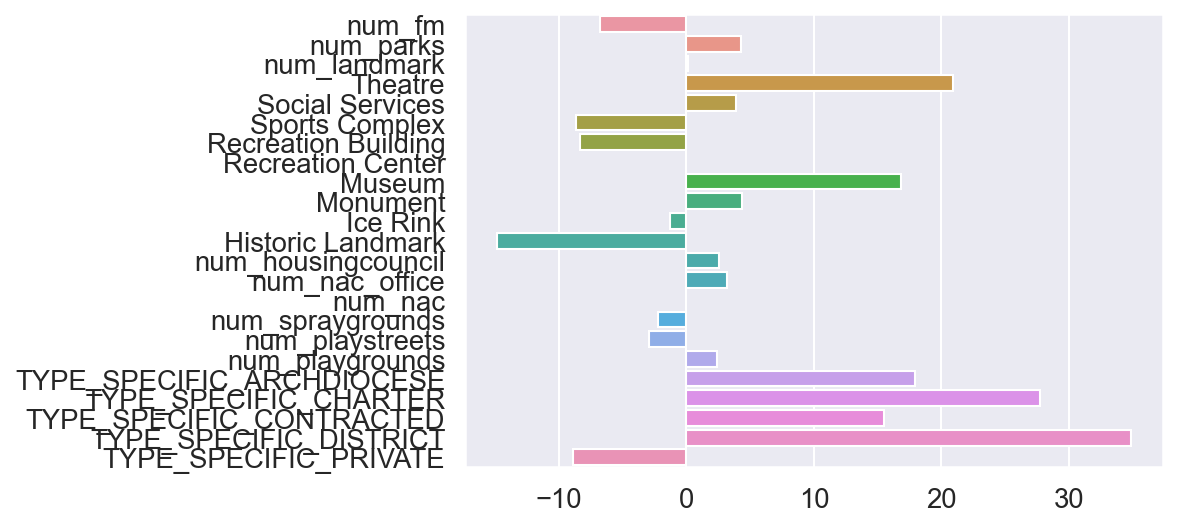

In [450]:
plt.figure(dpi=150)
sns.set(font_scale=1.2) 

colnames = ['Murals/Public Art', 'Zoo','Social Services','Recreation Building,','Recreation Center',\
            'Ice Rink','Neighborhood Advisory Comittee Offices','Neighborhood Advisory Comittees','Archdiocese-School',\
            'Charter-School',\
            'Contracted-School','Public-School']
#colnames = OutXs.columns[mask]
#colnames = [r'$\Delta\ SFMS [dex]$','$M_{h}/M_{*}$',
 #                r'$Q_{Bar,hcorr}$',r'$r_{opt}}$ [kpc]','D$_{3rd\ Gal}$ [Mpc]']
colnames = np.asarray(colnames)

ax = sns.barplot(x=orig_coef[mask], y=OutXs.columns[mask])
ax.set_yticklabels(colnames, fontsize=14)
plt.title("Lasso Model-Aggrevated Assault",fontsize=16)
plt.tight_layout()

#plt.savefig('SFR_RATIO_DG16_BAR_COEFS_M*.png',bbox_inches = 'tight')
plt.tight_layout()
#plt.savefig('../images/regression/total_crimes_lasso.png',bbox_inches = 'tight')
plt.show()


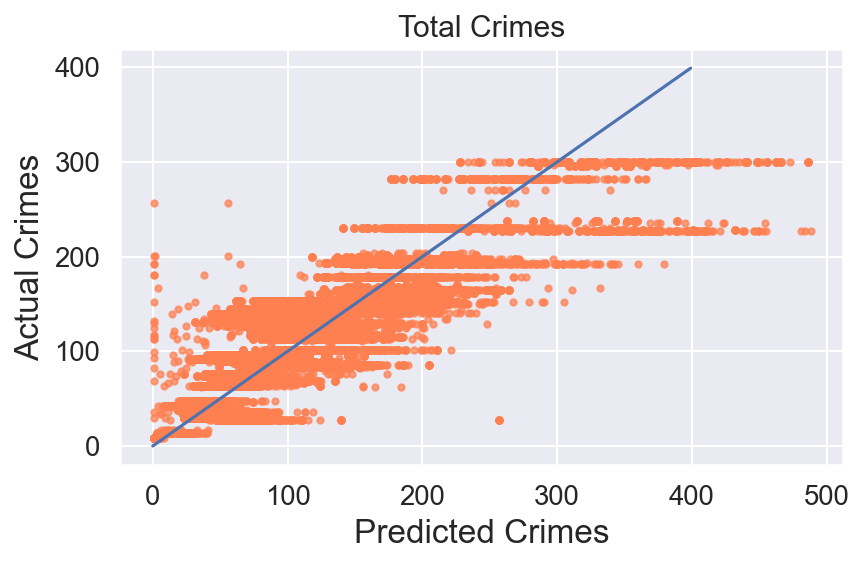

In [452]:
plt.figure(dpi=150)
plt.plot(outys,orig_pred,'.',color = 'coral',alpha = 0.7)
xr = np.arange(400)
plt.plot(xr,xr)
plt.xlabel('Predicted Crimes',fontsize=16)
plt.ylabel('Actual Crimes',fontsize=16)
plt.title('Total Crimes')
plt.tight_layout()
#plt.savefig('../images/regression/total_crimes_regression_lasso.png',bbox_inches = 'tight')
plt.show()


<AxesSubplot:xlabel='num_crimes'>

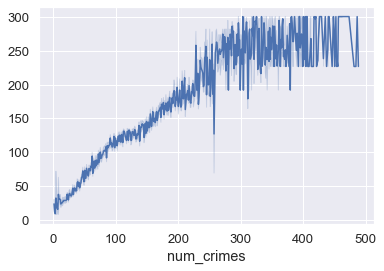

In [316]:
sns.lineplot(x=outys,y=orig_pred)

In [338]:
from scipy.stats import binned_statistic
s, edges, _ = binned_statistic(outys,outys-orig_pred,bins=np.arange(0,500,50), statistic='median')
e, eedges, _ = binned_statistic(outys,outys-orig_pred,bins=np.arange(0,500,50), statistic='std')

In [336]:
s

array([ -7.56832528, -17.60161633,  -7.01069939,  14.32722005,
        35.29259832,  24.30449605,  48.73255181, 119.47283566,
       147.73255181])

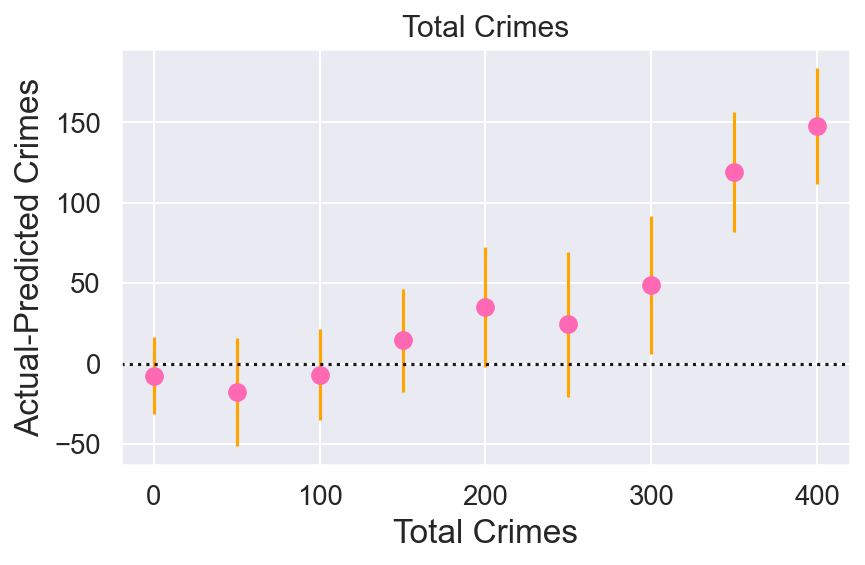

In [361]:
plt.figure(dpi=150)
plt.plot(edges[:-1],s,'o',color = 'hotpink',ms=8)
plt.errorbar(edges[:-1],s,yerr = e,color = 'orange',fmt='none')
plt.axhline(y=0,color = 'k',ls =':')
plt.ylabel('Actual-Predicted Crimes',fontsize=16)
plt.xlabel('Total Crimes',fontsize=16)
plt.title('Total Crimes')
plt.tight_layout()
plt.savefig('../images/regression/total_crimes_residuals_lasso.png',bbox_inches = 'tight')
plt.show()